In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

%matplotlib inline
from scipy.stats import zscore

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, average_precision_score, classification_report
from sklearn.model_selection import cross_val_predict, train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
import xgboost as xgb
from collections import Counter

from sklearn.preprocessing import RobustScaler, MinMaxScaler
from scipy.stats import boxcox 

from sklearn.decomposition import PCA

AttributeError: module 'sklearn.utils._openmp_helpers' has no attribute '__pyx_capi__'

In [ ]:
df=pd.read_csv('C:/Users/MohitLewis/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.shape

# EDA ANALYSIS

In [ ]:
df.columns

In [ ]:
df.columns.to_series().groupby(df.dtypes).groups

In [ ]:
df.info()

In [ ]:
df.describe().T

In [ ]:
df.describe(include='O').T

In [ ]:
df.isnull().sum()

In [ ]:
df.nunique()

In [ ]:
df[df.duplicated()]

In [ ]:
df.duplicated().sum()

In [ ]:
#check statistical properties of your data
df.describe()

In [ ]:
df.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis=1, inplace=True)

In [ ]:
object_datatypes=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='O':
        object_datatypes.append(x)
object_datatypes 

In [ ]:
integer_datatypes=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='int64':
      integer_datatypes.append(x)
integer_datatypes

In [ ]:
df.nunique().to_frame("Unique values")

In [ ]:
for col in object_datatypes:
    print(col)
    print(df[col].value_counts())
    print("="*80)

In [200]:
# check our target Is balanced or imbalanced data ?
df['Attrition'].value_counts()

0.000000    1233
0.693147     237
Name: Attrition, dtype: int64

# Visualization

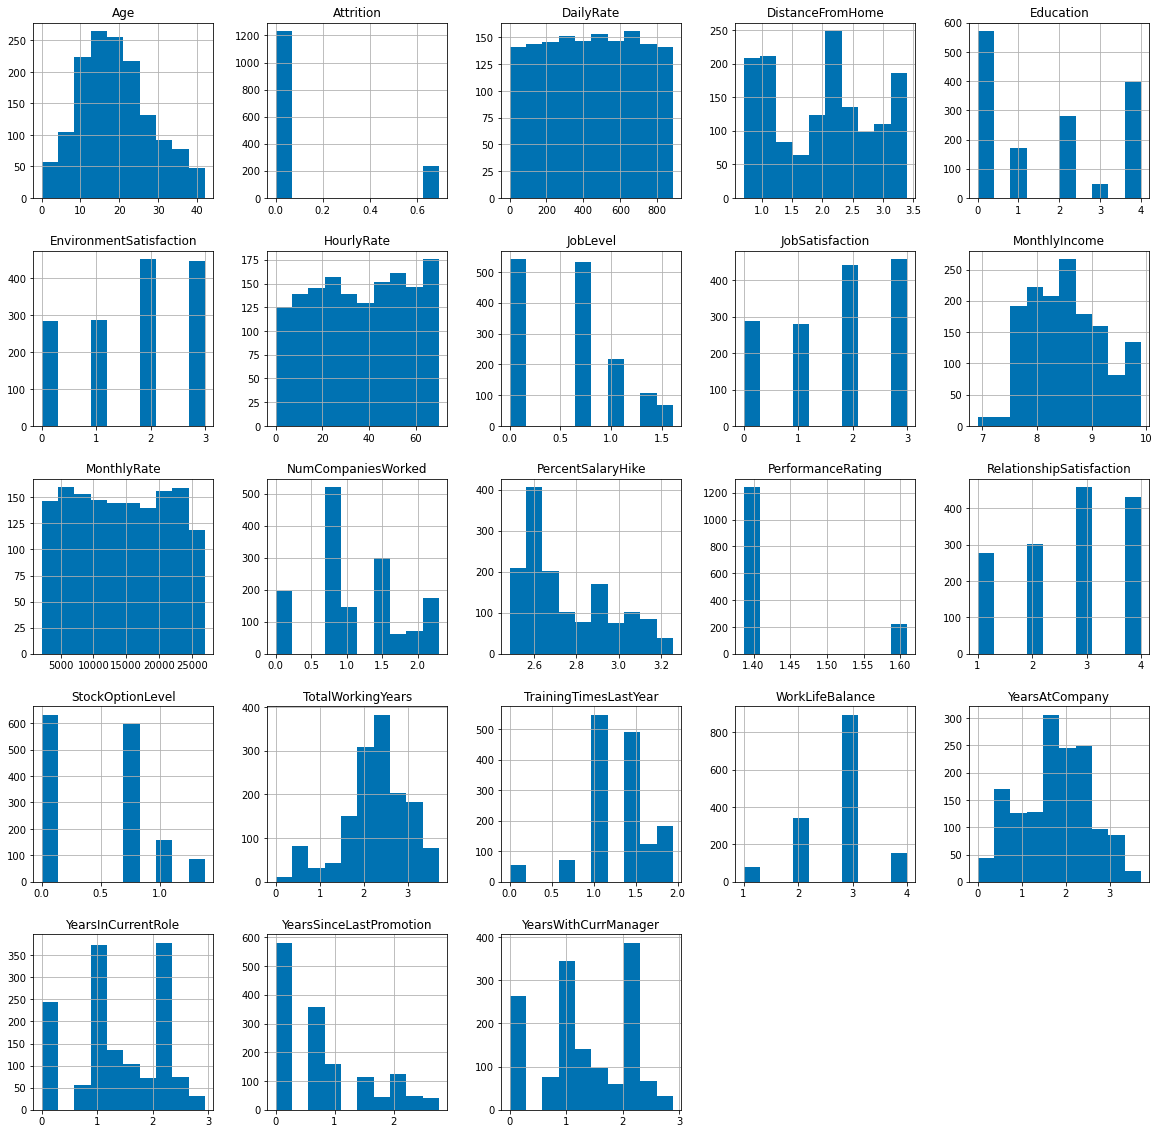

In [201]:
# Let's see the distrubtion of all numeric variables
# Plotting the numerical variables in histograms to see their distribution.
df.hist(figsize=(20,20))
plt.show()

0.000000    1233
0.693147     237
Name: Attrition, dtype: int64


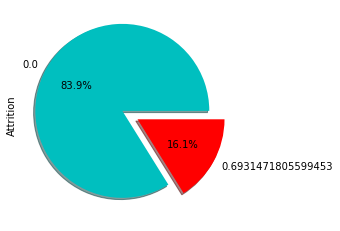

In [202]:
# we will encoding our target:
# 1 ---> 'Yes'
# 0 ---> 'No'
df['Attrition'].replace("No" , 0 , inplace = True)
df['Attrition'].replace("Yes" , 1 , inplace = True)
df['Attrition'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=['c','r'])
print(df['Attrition'].value_counts())

KeyError: '0.0'

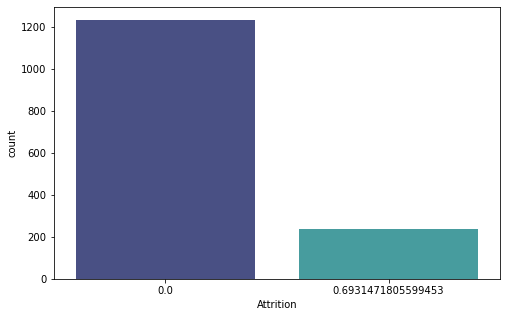

In [203]:
plt.figure(figsize=(8,5))
col_name = 'Attrition'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()


In [ ]:
plt.figure(figsize=(8,5))
col_name = 'Gender'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
col_name = 'OverTime'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
col_name = 'BusinessTravel'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
col_name = 'Department'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
col_name = 'MaritalStatus'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
col_name = 'EducationField'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
col_name = 'JobRole'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

In [ ]:
sns.barplot(x='YearsAtCompany',y='MonthlyIncome',data=df)

In [ ]:
df.plot(x='YearsAtCompany',y='MonthlyIncome',kind='scatter')

In [ ]:
sns.countplot(df['TotalWorkingYears'])


In [ ]:
# Plotting the categorical variables to see their distribution
fig=plt.figure(figsize=(20,50))
plt.style.use('seaborn-colorblind')
for i in range(len((df.select_dtypes(include='object')).columns)):
    fig.add_subplot(11,3,i+1)
    df.select_dtypes(include='object').iloc[:,i].value_counts().plot(kind="pie",  subplots=True,autopct='%1.1f%%',
        shadow=True, startangle=180)

#  Effect of Gender 0n Attrition

In [ ]:
plt.figure(figsize=(8,5))
total = float(len(df))
plt.subplot(1,2,1)
ay=sns.countplot(x="Gender",data=df)
for p in ay.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ay.annotate(percentage, (x, y),ha='right')
plt.subplot(1,2,2)
ax = sns.countplot(x="Gender", hue="Attrition", data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')

# Effect of the Distance from home on attrition 

In [ ]:
plt.figure(figsize = (10 , 10))
plt.subplot(2 ,1,1)
sns.countplot(x= 'DistanceFromHome' ,data =df ,palette='winter_r')
plt.title('DistanceFromHome')
plt.subplot(2,1,2)
sns.countplot(x= 'DistanceFromHome' ,data = df ,palette='winter_r'  ,hue =df['Attrition'])

In [ ]:
df_left=df[df[ 'Attrition']==1]['DistanceFromHome'] 
df_stay=df[df[ 'Attrition']==0]['DistanceFromHome'] 

sns.kdeplot(df_left, label = 'Employee left', shade = True, color = 'r' )
sns.kdeplot(df_stay, label = 'Employee stay', shade = True, color = 'b')
plt.legend()
plt.show()

# Effect of Age on attrition

In [ ]:
plt.figure(figsize = (10, 10))
sns.histplot(x = 'Age', hue = 'Attrition', data = df ,     kde=True )

# Effect of Education on attrition 

In [ ]:
plt.figure(figsize=(10,10))
df['Education'] = df['Education'].replace([1,2,3,4,5],['Below College','College', 'Bachelor', 'Master', 'Doctor'])
sns.countplot(x= 'Education' ,data =df ,palette='winter_r',hue='Attrition')
plt.title('Education Vs Attrition')
plt.show()

# Effect of Education level on attrition

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x= 'EducationField' ,data =df ,palette='winter_r',hue='Attrition')
plt.title('EducationField Vs Attrition')
plt.show()

# Effect of MaritalStatus on attrition 

In [ ]:
a=sns.countplot(x= 'MaritalStatus' ,data =df ,palette='winter_r',hue='Attrition')
plt.title('MaritalStatus Vs Attrition')
for p in a.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    a.annotate(percentage, (x, y),ha='right')

plt.show()

# Effect of Department on attrition 

In [ ]:
plt.figure(figsize = (10 , 10))
plt.subplot(2 ,1,1)
q=sns.countplot(x= 'Department' ,data = df ,palette='Set2',)
plt.title('Departments')
for p in q.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    q.annotate(percentage, (x, y),ha='right')
plt.subplot(2,1,2)
u=sns.countplot(x= 'Department' ,data = df ,palette='Set2'  ,hue =df['Attrition'])
for p in u.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    #u.annotate(percentage, (x, y),ha='left')
    u.annotate(y,(x,y),ha='left')
plt.show()

# Effect of job role on attrition

In [ ]:
plt.figure(figsize = (10 , 13))
plt.subplot(2 ,1,1)
sns.countplot(y= 'JobRole' ,data =df ,palette='winter_r')
plt.title('JOB ROLE')
plt.subplot(2,1,2)
sns.countplot(y= 'JobRole' ,data = df ,palette='winter_r'  ,hue =df['Attrition'])

# Effect of OverTime on attrition

In [ ]:
plt.figure(figsize = (10 , 10))
plt.subplot(2 ,1,1)
a=sns.countplot(x= 'OverTime' ,data =df ,palette='husl')
plt.title('JOB ROLE')
plt.subplot(2,1,2)
b=sns.countplot(x= 'OverTime' ,data = df ,palette='husl'  ,hue =df['Attrition'])
for p in a.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    a.annotate(percentage, (x, y),ha='left')
    #a.annotate(y,(x,y),ha='left')
for p in b.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    #b.annotate(percentage, (x, y),ha='left')
    b.annotate(y,(x,y),ha='left')
plt.show()

# effect of BusinessTravel on attrition

In [ ]:
df['BusinessTravel'].value_counts().plot(kind='pie',explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,colors=['b','r','g'])
print(df['BusinessTravel'].value_counts())

In [ ]:
b=sns.countplot(x= 'BusinessTravel' ,data = df ,palette='hls'  ,hue =df['Attrition'])
for p in b.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    b.annotate(percentage, (x, y),ha='right')
    #b.annotate(y,(x,y),ha='left')
plt.show()

# effect of JobInvolvement on attrition 

In [ ]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
df['JobInvolvement'] = df['JobInvolvement'].replace([1,2,3,4],['Low','Meduim', 'High', 'Very High'])
a=sns.histplot(x= 'JobInvolvement' ,data = df ,palette='coolwarm'  )

plt.subplot(1,2,2)
b=sns.countplot(x= 'JobInvolvement' ,data = df ,palette='coolwarm'  ,hue =df['Attrition'])
for p in b.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    #b.annotate(percentage, (x, y),ha='right')
    b.annotate(y,(x,y),ha='left')
plt.show()

# Effect of Work-Life Balance, Job Satisfaction, Relationship Satisfaction, Enviroment Satisfaction on attrition 

In [ ]:
df_4=df[['WorkLifeBalance','JobSatisfaction','RelationshipSatisfaction','EnvironmentSatisfaction']]
for i,col in enumerate(df_4.columns):
    plt.figure(figsize = (10 , 10))
    plt.subplot(2 ,2,i+1)
    b=sns.countplot(x= col ,data = df ,palette='winter_r',hue =df['Attrition'])
    for p in b.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        #b.annotate(percentage, (x, y),ha='right')
        b.annotate(y,(x,y),ha='right')

# Effect of YearsWithCurrManager on attrition 

In [ ]:
df_left=df[df[ 'Attrition']==1]['YearsWithCurrManager'] 
df_stay=df[df[ 'Attrition']==0]['YearsWithCurrManager'] 

sns.kdeplot(df_left, label = 'Employee left', shade = True, color = 'r' )
sns.kdeplot(df_stay, label = 'Employee stay', shade = True, color = 'g')
plt.legend()
plt.show()

# Effect of TotalWorkingYears, YearsInCurrentRole, YearsAtCompany, TrainingTimesLastYear on attrition 

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.histplot(x= 'TotalWorkingYears' ,data =df ,palette='winter_r',hue='Attrition')
plt.subplot(2,2,2)
sns.histplot(x= 'YearsAtCompany' ,data =df ,palette='winter_r',hue='Attrition')
plt.subplot(2,2,3)
sns.histplot(x= 'YearsInCurrentRole' ,data =df ,palette='winter_r',hue='Attrition')
plt.subplot(2,2,4)
sns.histplot(x= 'TrainingTimesLastYear' ,data =df ,palette='winter_r',hue='Attrition')
plt.show()

In [ ]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatypes].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="Reds")
    index += 1
plt.show()

In [ ]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatypes].items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.show()

# Relations 

In [ ]:
#relation between education and monthlyIncome ?
plt.title('Education Vs MonthlyIncome')
sns.boxplot(x=df['Education'],y=df['MonthlyIncome'])
plt.show()

In [ ]:
#relation between the MonthlyIncome and Gender ?
plt.title('MonthlyIncome VS. Gender')
sns.boxplot(x=df['Gender'],y=df['MonthlyIncome'])
plt.show()

In [ ]:
#relation between the MonthlyIncome and JobRole ?
plt.title('MonthlyIncome VS. JobRole')
sns.boxplot(y=df['JobRole'],x=df['MonthlyIncome'])
plt.show()

In [ ]:
 #relation between the MonthlyIncome and TotalWorkingYears ?
plt.figure(figsize=(10,10))
sns.boxplot(x=df['TotalWorkingYears'],y=df['MonthlyIncome'])
plt.title('TotalWorkingYears VS. MonthlyIncome')
plt.show()

In [ ]:
# relation between YearsInCurrentRole and MonthlyIncome ?
plt.figure(figsize=(10,12))
sns.boxplot(x=df['YearsInCurrentRole'],y=df['MonthlyIncome'])
plt.title('YearsInCurrentRole VS. MonthlyIncome')
plt.show()

In [ ]:
#relation between MaritalStatus and MonthlyIncome ?
sns.boxplot(x=df['MaritalStatus'],y=df['MonthlyIncome'],hue=df['Attrition'])
plt.show()

In [ ]:
# relation between Age and JobInvolvement ?
plt.figure(figsize=(10,10))
sns.boxplot(x=df['Age'],y=df['JobInvolvement'],hue=df['Attrition'],palette='winter_r')
plt.show()

In [ ]:
#relation between MaritalStatus and DistanceFromHome ?
plt.figure(figsize=(10,10))
sns.boxplot(x=df['MaritalStatus'],y=df['DistanceFromHome'],hue=df['Attrition'],palette='husl')
plt.show()

In [ ]:
 #relation between Work-Life Balance & Distance From Home ?
plt.figure(figsize=(10,10))
sns.boxplot(x=df['DistanceFromHome'],y=df['WorkLifeBalance'],hue=df['Attrition'],palette='winter_r')
plt.show()

# Encoding the categorical object datatype columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [ ]:
df['Attrition']=labelencoder.fit_transform(df['Attrition'])
df['Attrition']

In [ ]:
df.iloc[:,0]=labelencoder.fit_transform(df.iloc[:,0].values)
df.iloc[:,3]=labelencoder.fit_transform(df.iloc[:,3].values)
df.iloc[:,6]=labelencoder.fit_transform(df.iloc[:,6].values)
df.iloc[:,8]=labelencoder.fit_transform(df.iloc[:,8].values)
df.iloc[:,10]=labelencoder.fit_transform(df.iloc[:,10].values)
df.iloc[:,12]=labelencoder.fit_transform(df.iloc[:,12].values)
df.iloc[:,14]=labelencoder.fit_transform(df.iloc[:,14].values)
df.iloc[:,18]=labelencoder.fit_transform(df.iloc[:,18].values)

In [ ]:
print(df['Attrition'].unique())
print(df['OverTime'].unique())
print(df['Department'].unique())
print(df['BusinessTravel'].unique())
print(df['EducationField'].unique())
print(df['Gender'].unique())
print(df['JobRole'].unique())
print(df['MaritalStatus'].unique())

# Correlation using a Heatmap

In [ ]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(26,18))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cubehelix_r", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
#Correlation Bar Plot comparing features with our labeldf_corr = df.corr()
plt.figure(figsize=(15,5))
df_corr['Attrition'].sort_values(ascending=False).drop('Attrition').plot.bar()
plt.title("Correlation of Features vs Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

# Outlier Analysis & Filtering 

In [ ]:
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    out=[]
    for i in df:
        if (i > q3 or i < q1) and i>0:
            out.append(i)
    print("Outliers:",out)
    return out;
def remove_outliers(df):
    print("Registers in the initial dataset:",df.shape[0])
    for col in df.columns[1:]:
        if df[col].dtype != 'object':
            print(col)
            data_filter = Winsorization_outliers(df[col])
            df = df[~df[col].isin(data_filter)]
            print("Registers without outliers in "+col+" :"+ str(df.shape[0]))
    return df;

df_Cleaned = remove_outliers(df)

# Feature Engineering

In [ ]:
df_Cleaned['Attrition'] = df_Cleaned['Attrition'].apply(lambda x: 0 if x == 'No' else 1)

In [ ]:
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in df_Cleaned.columns[1:]:
    if df_Cleaned[col].dtype == 'object':
        if len(list(df_Cleaned[col].unique())) <= 2:
            le.fit(df_Cleaned[col])
            df_Cleaned[col] = le.transform(df_Cleaned[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

# convert rest of categorical variable into dummy
df_Cleaned = pd.get_dummies(df_Cleaned, drop_first=True)

In [ ]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatypes].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="prism")
    index += 1
plt.show()

In [ ]:
df.skew()

# Using Log Transform to fix skewness

In [ ]:
for col in integer_datatypes:                       #applied log ransformation on numerical data
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [ ]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatypes].items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade": True})
    index += 1
plt.show()

In [204]:
# Reducing in 2 components your data with Principal Component Analysis to filter outliers through Mahalanobis Distance.
n=2
training_data = df_Cleaned.copy()
pca = PCA(n_components=n, svd_solver= 'full')
X_train_PCA = pca.fit_transform(training_data)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = training_data.index
X_train_PCA.head()


plt.figure(figsize=(15,6))
sns.scatterplot(x=X_train_PCA[0],data=X_train_PCA,y=X_train_PCA[1])
plt.title('PCA Plot with {} variables'.format(pca.n_components_))
plt.show()

#PCA Explained Variance Ratio & Components
print ( "Components = ", pca.n_components_ , ";\nTotal explained variance = ",
      round(pca.explained_variance_ratio_.sum(),5)  )

NameError: name 'PCA' is not defined

In [ ]:
X = df.drop('Attrition', axis=1)
Y = df['Attrition']

In [ ]:
#Resolving the class imbalance issue in label column¶
Y.value_counts()

In [ ]:
# adding samples to make all the categorical quality values same

!pip install -U imbalanced-learn
from imblearn.oversampling import SMOTETomek
smt = SMOTE(random_state=42)
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

# Feature Scaling

In [ ]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()